## Avocado Project

### Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

#### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
##### Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Flip lobo\Project Evaluation\First Phase\avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Observations:
- Dataset includes 18249 rows and 14 columns
- Out of 14 columns we have two different targets; Target (Region) for Classification problem and Target (Average Price) for Regression problem. Hence, we have to deal both problems separately.
- Can see Feature (Unnamed) is unqiue ID and same can be dropped from data set.
- Dataset includes continuous and categorical data.

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Observations:
- Can see first 5 rows of the dataset.
- Includes both continuous and categorical datas.
- Can see column (XLarge Bags) having zero value, we need to investigate further

In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


### Osbervations:
- Can see last 5 rows of the dataset.

In [5]:
df.shape

(18249, 14)

### Observations:
Dataset includes 18249 rows and 14 columns

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Observations:
- No null values found in any of the features.

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

### Observations:
- Most of the columns contains float data type. 
- However, following columns (Unnamed, year) contains integer data type.
- And following columns (Date, type, region) contains object. Will apply imputation technique.
- However, for Date ideal data type is datetime, will deal accordingly.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Observations:
- Confirmed same observations like seen earlier related to data type of each column.
- Also, confirmed no null values found

In [9]:
for i in df:
    print(df[i].value_counts())
    print('\n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

### Observations:
- Can see wide distribution in all features.
- Target (Average price) value for Regression problem is distributed from 1 to 202.
- Target (Region) for Classification problem seems balanced.

In [10]:
## List of columns of dataset
print(list(df.columns))

['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']


In [11]:
df.nunique().to_frame('No. of unique values')

,No. of unique values
Unnamed: 0,53
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082


### Observations:
- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it.
- Basis unique value, can see diversity in almost all continuous columns (except year column having 4 unique values, except categorical columns (type) having 2 unique values)
- Target variable for Regression Problem having 259 unique value
- Target variable for Classification Problem having 54 unique value 
- Will see the distribution of the same to check skewness and outliers.

In [12]:
## Dropping Unnamed column
df = df.drop(['Unnamed: 0'], axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Osbervations:
- After removing Unnamed column, Final data shape contains 18249 and 13 columns

In [13]:
## Checking duplicate
df1 = df[df.duplicated()]
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


### Observations:
- Confirmed no duplicate found in dataset.

In [14]:
## Converting object data type of Date to correct data type as datetime
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [15]:
## Set Date as index
df = df.set_index(df.columns[0])

In [16]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


### Observations:
- After transfering Date columns to index, we have 18249 rows and 12 columns
- Out of which 2 are target variable basis Regression and Classification problems

In [17]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Observations:
- Confirmed no null values
- Have checked std deviation, outliers, 25%, 75%, mean values
- We need to do further analysis to check outliers and skewness and deal accordingly.

In [18]:
## separating columns basis data type (catgeorical and numerical)
cat_col = []
num_col = []

for i in df.columns:
    if df[i].dtypes == object:
        cat_col.append(i)
    else:
        num_col.append(i)
print('Categorical columns: ', cat_col)
print('Numerical columns: ', num_col)

Categorical columns:  ['type', 'region']
Numerical columns:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


### Observations:
- Out of 12 columns (including target variables), 2 columns (type and region - target varibale for Classification problem) are categorical columns

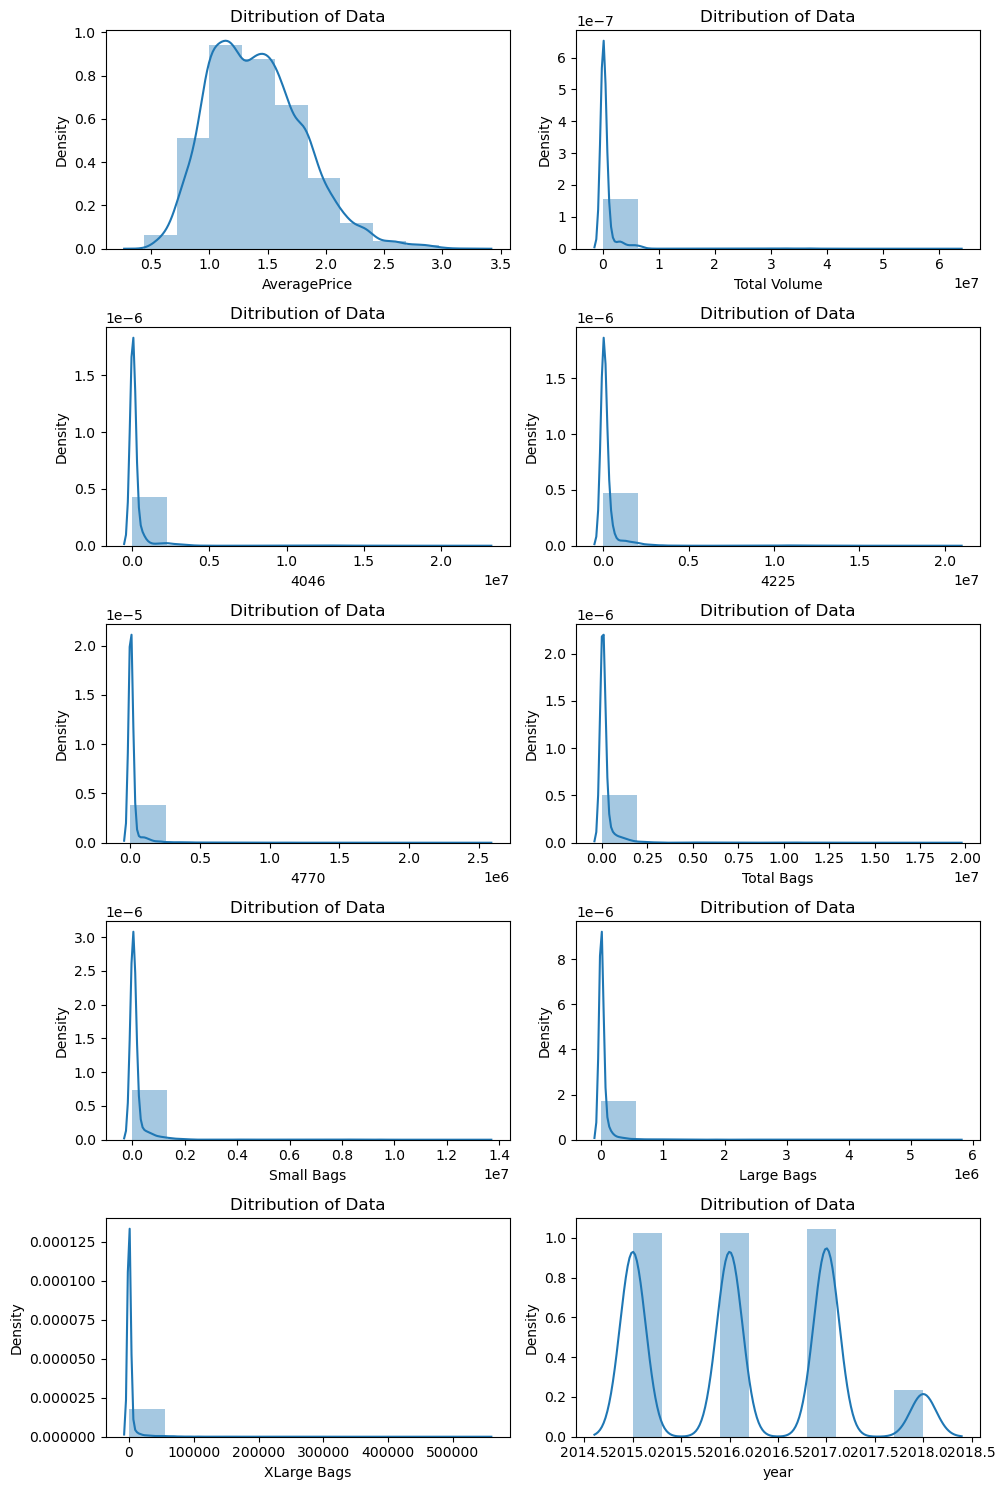

In [19]:
## Check distribution of data in each numerical column

plt.figure(figsize = (10, 15))
plotnumber = 1
for i in num_col:    
    if plotnumber <=10:
        plt.subplot(5,2, plotnumber)
        sns.distplot(df[i], bins=10)
        plt.xlabel(i, fontsize=10)
        plt.title('Ditribution of Data')
    plotnumber+=1
plt.tight_layout()     

### Observations:
- Can see almost all columns having skewness on the right side.
- Avearage price is target variable, where can see data almost normally distributed, same goes with year column.- 

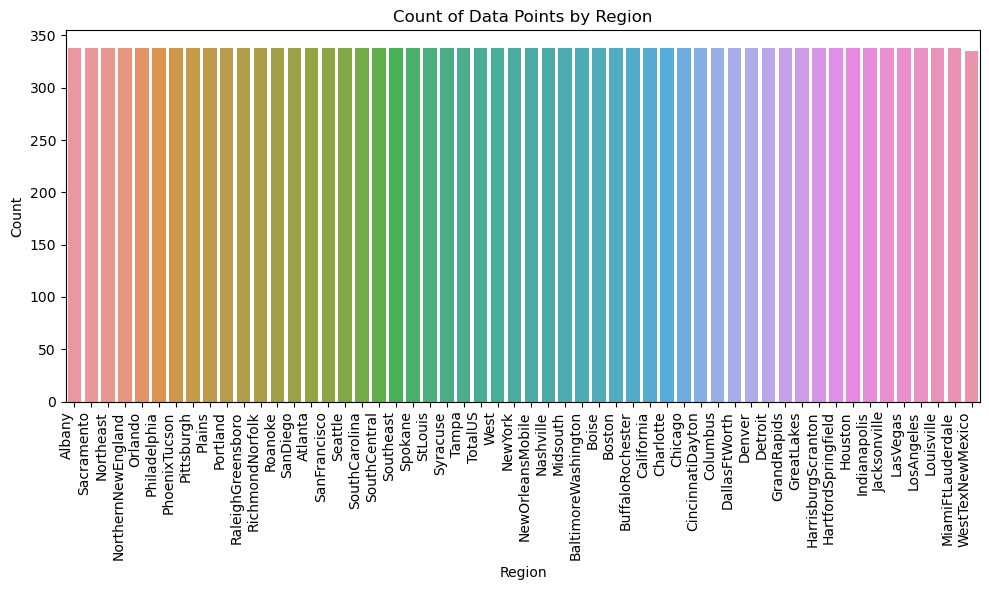

In [20]:
### Data distribution of region column (target variable)
plt.figure(figsize = (10, 6))
ax = sns.countplot(x='region', data=df, order=df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Data Points by Region')

plt.tight_layout()
plt.show()

### Observations:
- Can see all the catgeory of region are equally distributed between 54 regions and considered it as balanced variable.

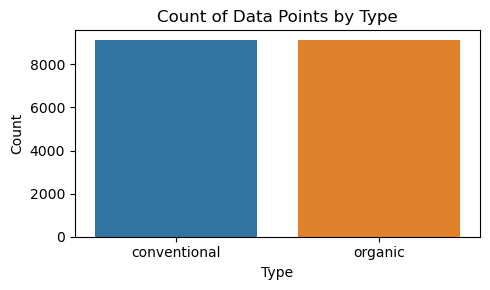

In [21]:
## Check distribution of type
plt.figure(figsize = (5, 3))
sns.countplot(df['type'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Data Points by Type')
plt.tight_layout()
plt.show()

### Observations:
- Can see category of Type Column are equally distribued between 'Conventional and Organic'

### Will do the encoding for column ('Type'). However, Region (target variable) will deal later

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

In [24]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico


### Observation:
- Can see Type column has been tranformed to integer.
- Where in 0 denotes Conventional and 1 denotes Organic

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int32(1), int64(1), object(1)
memory usage: 1.7+ MB


### Observations:
- Can see data type of column (type) is now integer.
- Only target variable ('Region') is with object and rest all are numerical data type.

In [26]:
## Separate x (includes all features) and y (include target variable for regression model)
x_reg = df.drop(['AveragePrice'], axis=1)
y_reg = df['AveragePrice']

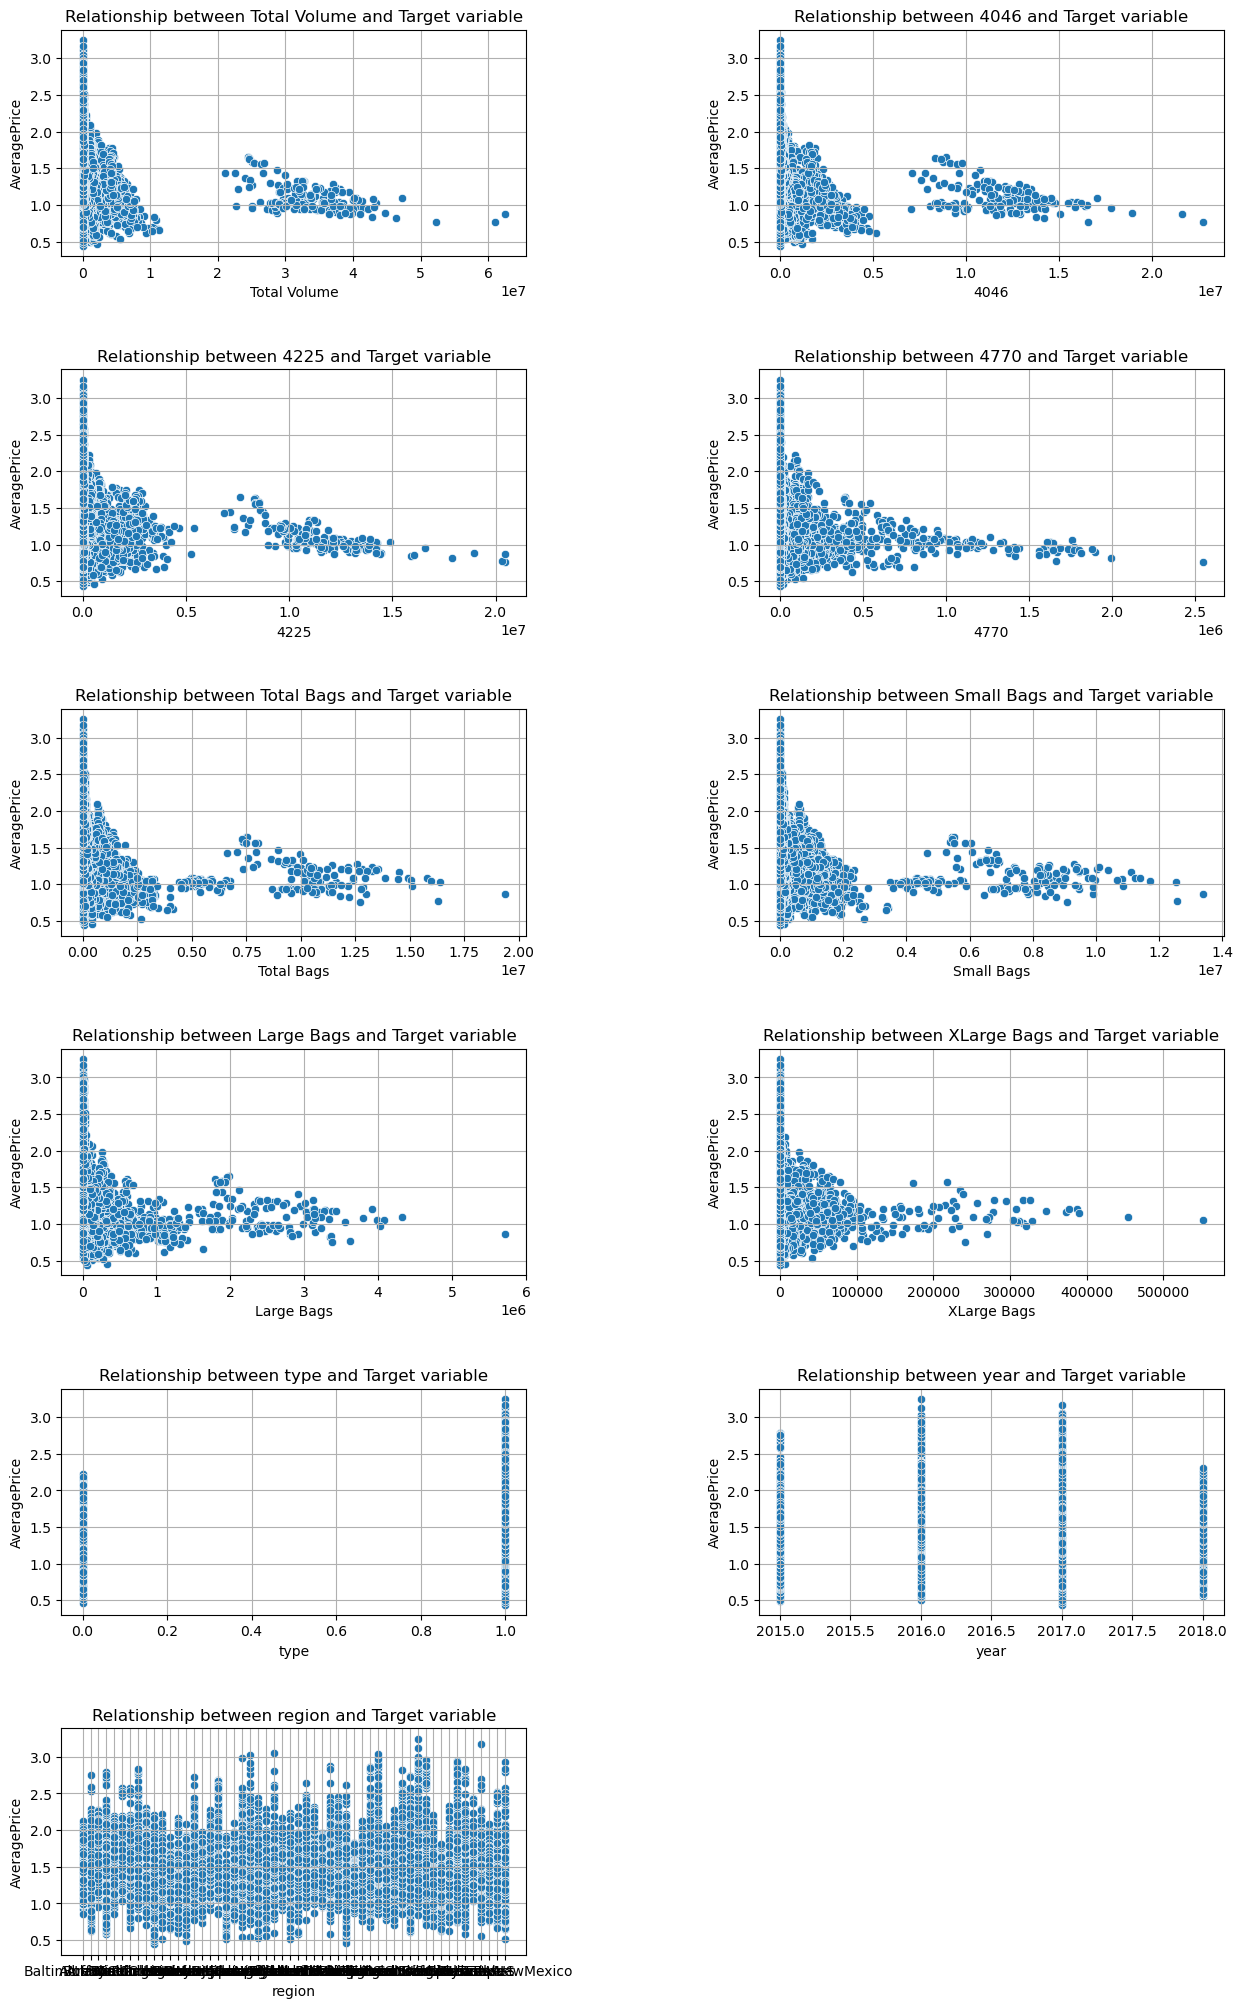

<Figure size 640x480 with 0 Axes>

In [27]:
## Will Check relationship between Target variable ('Average Price') with other features for builiding Regression model.
plt.figure(figsize =(15,25))
plotnumber = 1
for i in x_reg.columns:
    if plotnumber <=12:
        plt.subplot(6,2, plotnumber)
        sns.scatterplot(x=x_reg[i], y=y_reg)
        plt.xlabel(i, fontsize = 10)
        plt.ylabel('AveragePrice', fontsize = 10)
        plt.grid(axis='both')
        plt.title(f'Relationship between {i} and Target variable', fontsize=12)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)        
    plotnumber+=1
plt.show()
plt.tight_layout()

## Observations:
- Can see slight downside relations with following numerical features (Total volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags)
- However for catgeroical features:
 - 1) Its seems organic type data having more impact on Average price compare to conventionl type.
 - 2) Yearwise can say that Average price was high in 2016 and 2017 compare other two years 2015 and 2018.
 - 3) Due to having 54 category in Region column, its's not clearly visible will plot separately.
- Nevertheless, for all categorical column will do stripplot too to have more clarity on the relation with target variable

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

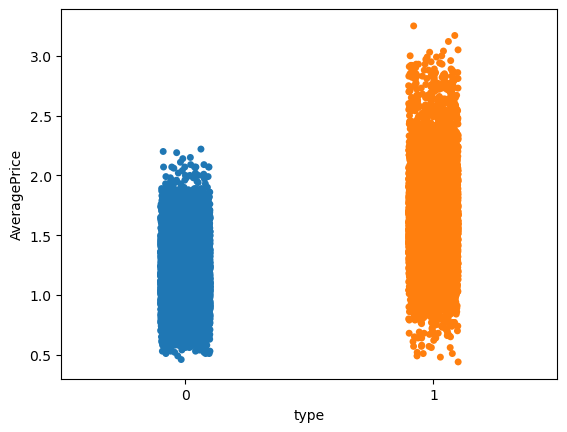

In [28]:
## Will Check relationship between Target variable ('Average Price') with other categorical features for builiding Regression model.

## Checking relation between Type and Target variable
sns.stripplot(x='type', y='AveragePrice', data=df)

### Observations:
- Its confirmed Category 1 (Organic) hvaing more impact on Average price.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

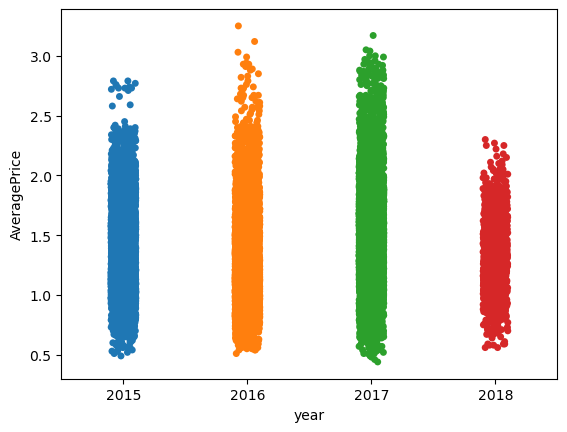

In [29]:
## Checking relation between Year and Target variable
sns.stripplot(x='year', y='AveragePrice', data=df)

### Observations:
- Can see average price increased from 2015 to 2016, slight down change in 2017 and significant decrease in 2018. 

In [30]:
## We are grouping to check Average Price per region in descending order
avg_price_per_region = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)
sorted_regions = avg_price_per_region.index.tolist()

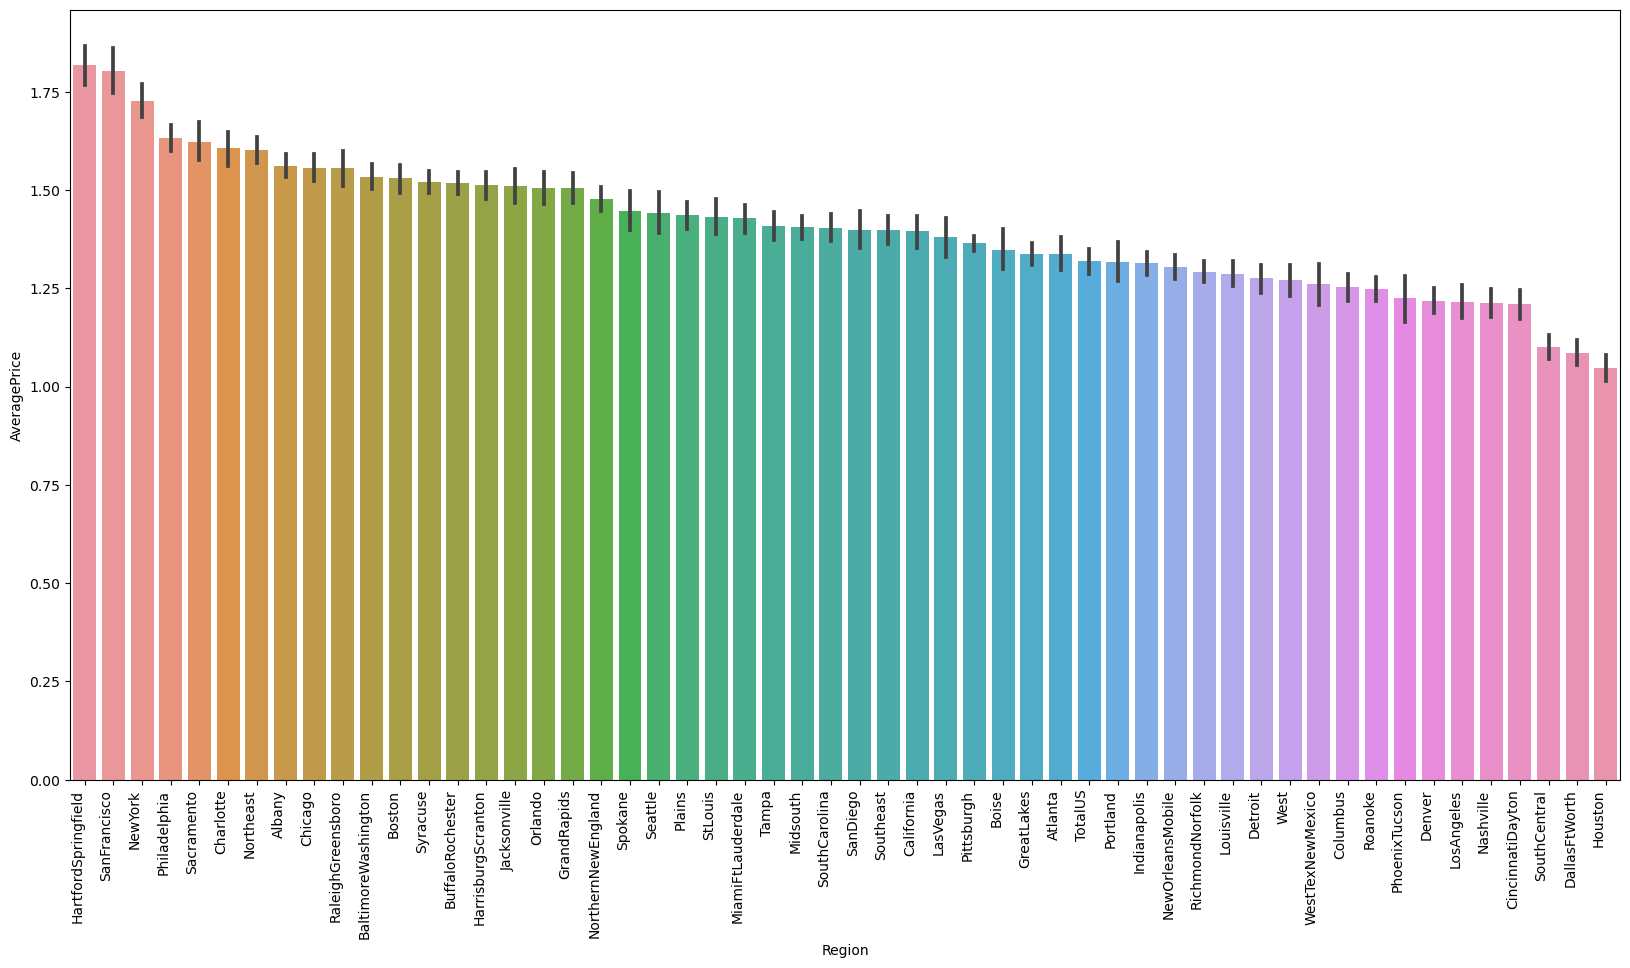

In [31]:
## Checking relation between Region and Target variable
plt.figure(figsize = (20, 10))
ax = sns.barplot(x= 'region', y='AveragePrice', data=df, order=sorted_regions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region', fontsize = 10)
plt.ylabel('AveragePrice', fontsize = 10)
plt.show()

### Observations:
- Average price has been plotted against Region where highest price of region come first.
- Can see Average price is varies in different regions.
- However, HartfordSpringfield and SanFranciso having alomost similar average price and highest in comaprison to other regions.
- Regions like SouthCentral, DallasFtWorth, and Houston seems to be in same range of average price and are lowest in comparison to other regions.

In [32]:
## Separate x (includes all features) and y (include target variable for classification model)
x_class = df.drop(['region'], axis=1)
y_class = df['region']

#### Will Check relationship between Target variable ('Region') with other features for builiding Classification model.

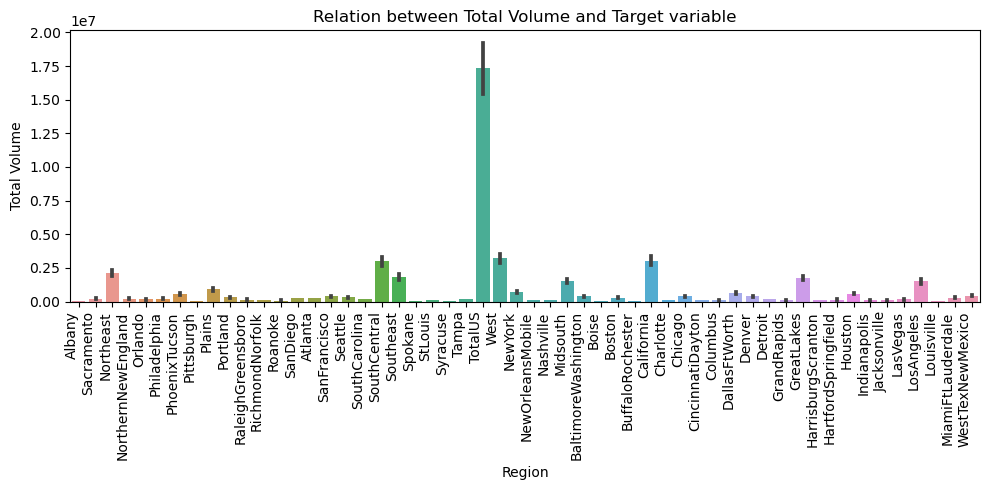

In [33]:
## Checking relation between Total volume and Target variable
plt.figure(figsize = (10, 5))
ax = sns.barplot(x='region', y='Total Volume', data=df, order=df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Relation between Total Volume and Target variable')

plt.tight_layout()
plt.show()

### Observations:
- Highest Total volume of avocados sold is in Total US region compare to other 54 regions.

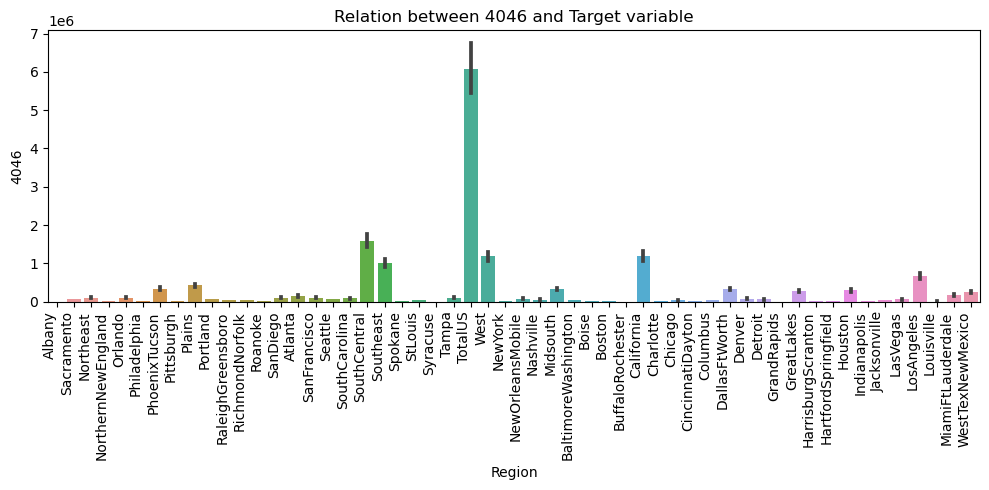

In [34]:
## Checking relation between 4046 and Target variable
plt.figure(figsize = (10, 5))
ax = sns.barplot(x='region', y='4046', data=df, order=df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region')
plt.ylabel('4046')
plt.title('Relation between 4046 and Target variable')

plt.tight_layout()
plt.show()

### Observations:
- High sold of Total number of avocados with PLU 4046 is in Total US region compare to other 54 regions.

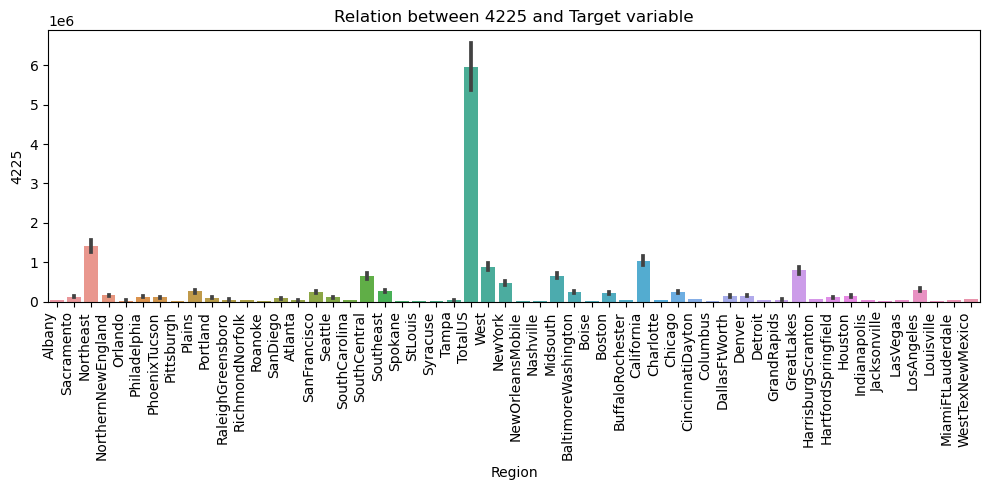

In [35]:
## Checking relation between 4225 and Target variable
plt.figure(figsize = (10, 5))
ax = sns.barplot(x='region', y='4225', data=df, order=df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region')
plt.ylabel('4225')
plt.title('Relation between 4225 and Target variable')

plt.tight_layout()
plt.show()

### Observations:
- High sold of Total number of avocados with PLU 4225 is in Total US region compare to other 54 regions.

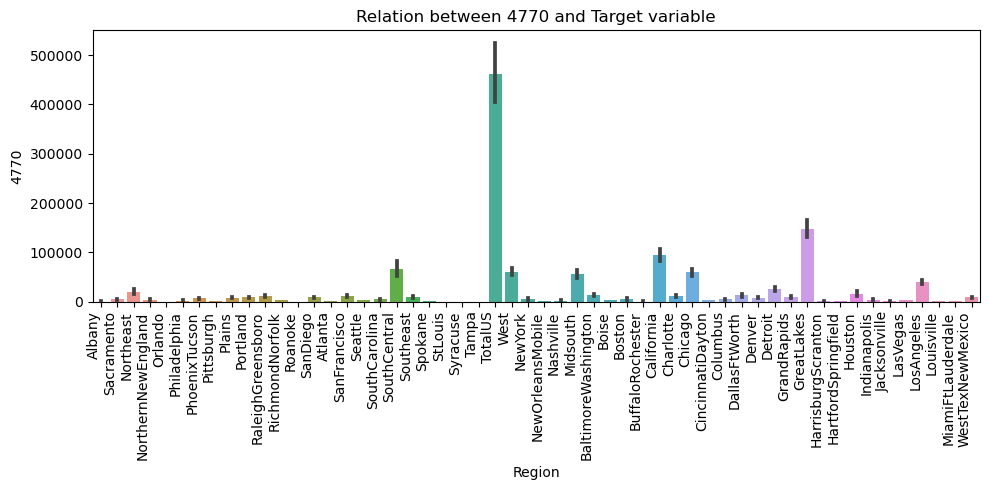

In [36]:
## Checking relation between 4770 and Target variable
plt.figure(figsize = (10, 5))
ax = sns.barplot(x='region', y='4770', data=df, order=df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region')
plt.ylabel('4770')
plt.title('Relation between 4770 and Target variable')

plt.tight_layout()
plt.show()

### Observations:
- High sold of Total number of avocados with PLU 4770 is in Total US region compare to other 54 regions.

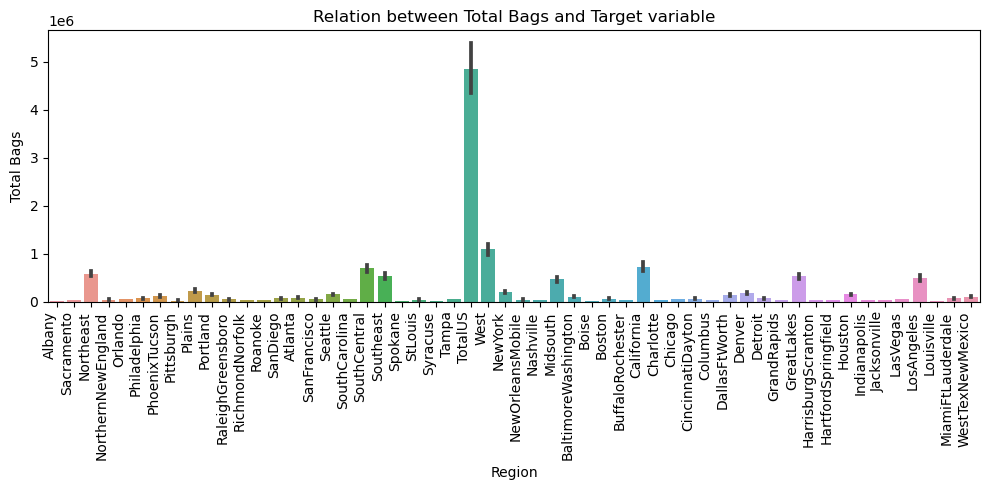

In [37]:
## Checking relation between Total Bags and Target variable
plt.figure(figsize = (10, 5))
ax = sns.barplot(x='region', y='Total Bags', data=df, order=df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region')
plt.ylabel('Total Bags')
plt.title('Relation between Total Bags and Target variable')

plt.tight_layout()
plt.show()

### Observations:
- Highest Total Bags of avocados sold in Total US region compare to other 54 regions.

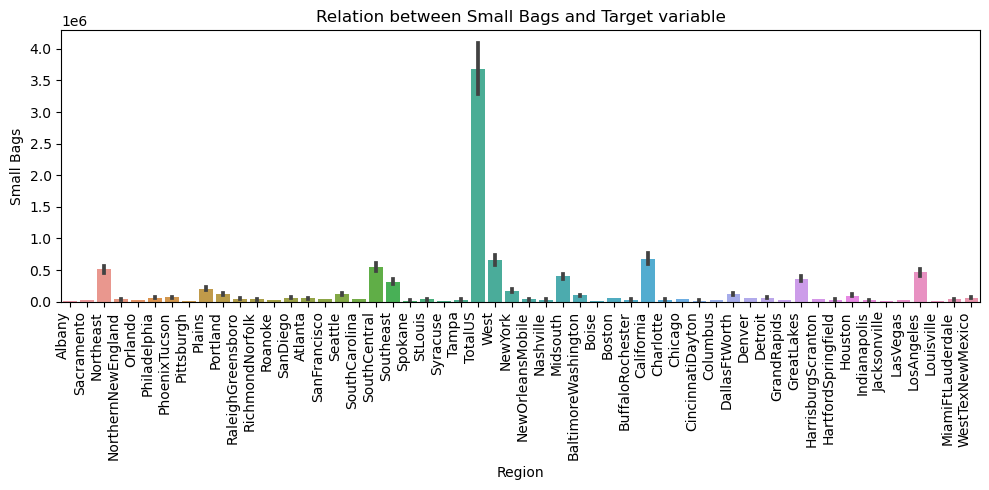

In [38]:
## Checking relation between Small Bags and Target variable
plt.figure(figsize = (10, 5))
ax = sns.barplot(x='region', y='Small Bags', data=df, order=df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region')
plt.ylabel('Small Bags')
plt.title('Relation between Small Bags and Target variable')

plt.tight_layout()
plt.show()

### Observations:
- Highest Small Bags of avocados sold in Total US region compare to other 54 regions.

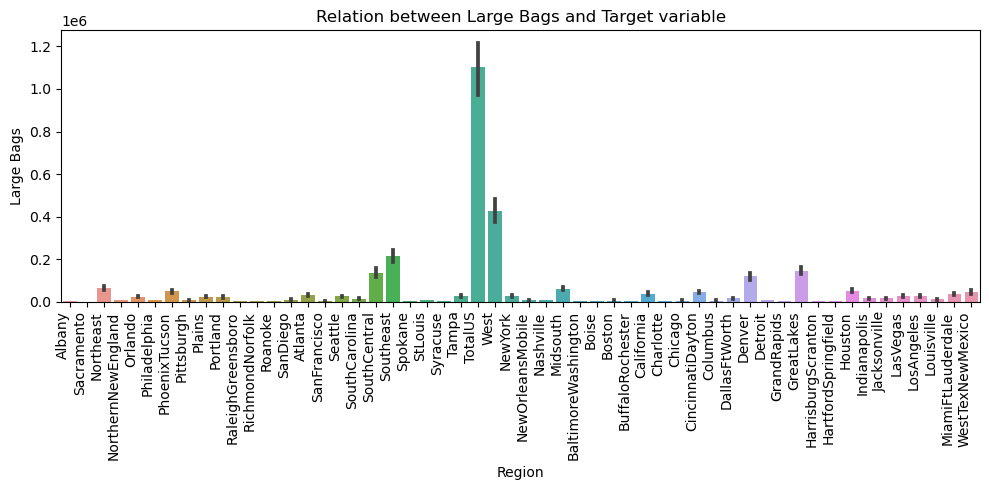

In [39]:
## Checking relation between Large Bags and Target variable
plt.figure(figsize = (10, 5))
ax = sns.barplot(x='region', y='Large Bags', data=df, order=df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region')
plt.ylabel('Large Bags')
plt.title('Relation between Large Bags and Target variable')

plt.tight_layout()
plt.show()

### Observations:
- Highest Large Bags of avocados sold in Total US region compare to other 54 regions.

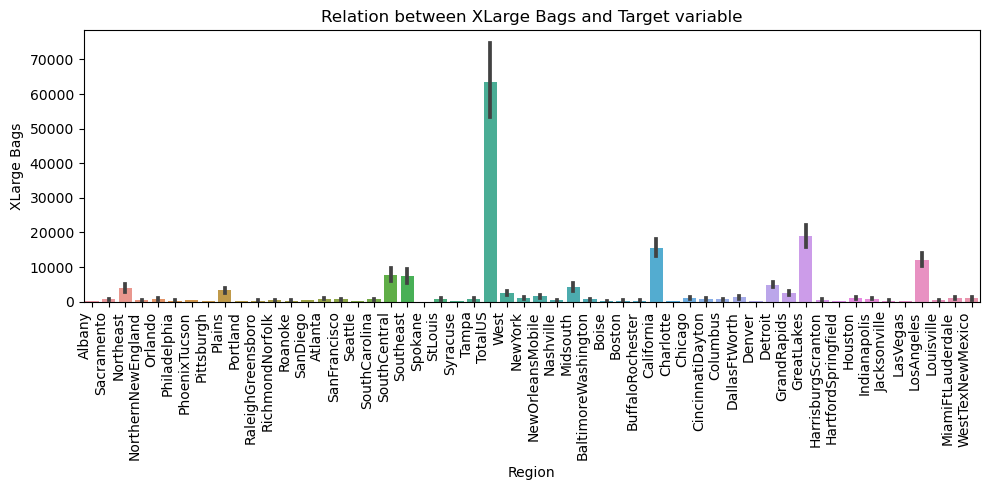

In [40]:
## Checking relation between XLarge Bags and Target variable
plt.figure(figsize = (10, 5))
ax = sns.barplot(x='region', y='XLarge Bags', data=df, order=df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Region')
plt.ylabel('XLarge Bags')
plt.title('Relation between XLarge Bags and Target variable')

plt.tight_layout()
plt.show()

### Observations:
- Highest XLarge Bags of avocados sold in Total US region compare to other 54 regions.

In [41]:
## Lets encode target variable

from category_encoders import BinaryEncoder
encoder = BinaryEncoder()
df_encoded = encoder.fit_transform(df)
df = df_encoded # transferring into main dataset.

In [42]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region_0,region_1,region_2,region_3,region_4,region_5
Date,,,,,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,0,0,0,0,1
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,0,0,0,0,1
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,0,0,0,0,1
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,0,0,0,0,1
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,1,1,0,1,1,0
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,1,0,1,1,0
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,1,0,1,1,0


### Observations:
- After transformation, data shape becomes 18249 rows and 17 columns (additional 6 columns basis applied binary encoder)

In [43]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region_0         0.300017
region_1         0.300017
region_2         0.223327
region_3         0.000329
region_4         0.000329
region_5        -0.000329
dtype: float64

### Observations:
- All continuous data columns having high skewness (like seen during distribution of data in each columns)
- However, no skewness can be seen in categorical data columns.
- Will check outliers and deal accordingly.

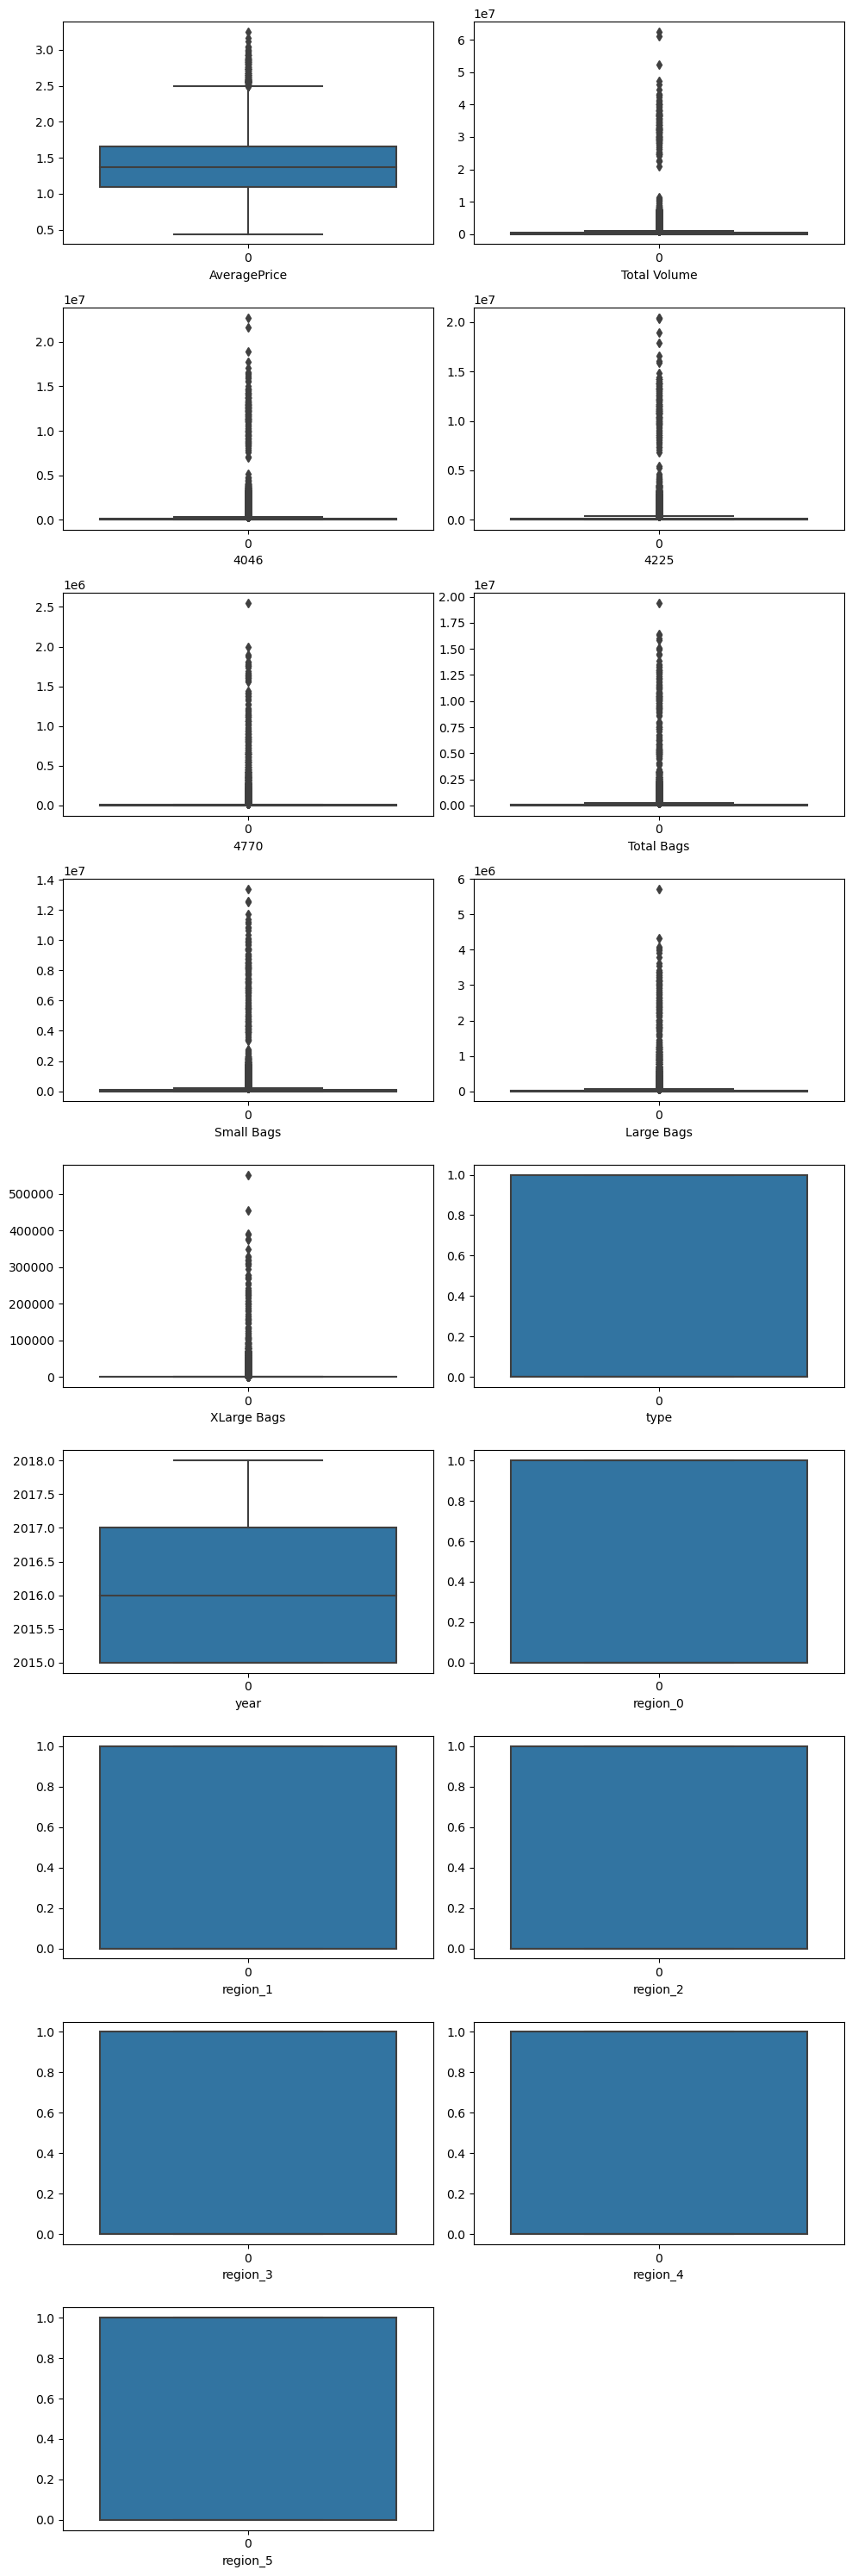

In [44]:
## Checking outliers
plt.figure(figsize = (10, 30))
number = 1
for col in df.columns:
    if number <= 18:
        plt.subplot(9, 2, number)
        sns.boxplot(data = df[col], orient = 'v')
        plt.xlabel(col)        
    number+=1
plt.tight_layout()

### Observations:
- All numerical columns having huge outliers.
- However, no outliers found in categorical columns
- Will deal outliers with zscore method

In [45]:
## removing outliers with z score
from scipy.stats import zscore
z = np.abs(zscore(df))
np.where(z>3)
df2 = df[(z<3).all(axis=1)]
old_data = df.shape[0]
new_data = df2.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)

Old data = 18249
New data =  17651
Loss data in percentage =  3.276891884486821


### Observations:
- With loss of 3.27% seems outlier has been stabilized.
- Will recheck skew and deal further accordingly

In [46]:
df2.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region_0        0.339884
region_1        0.329254
region_2        0.198943
region_3        0.033887
region_4       -0.017338
region_5       -0.016205
dtype: float64

In [47]:
df3 = df2.copy() ## copying data into new dataset to check skewness with different methods

In [48]:
df3 = np.cbrt(df3) ## handling skewness with cuberoot method

In [49]:
df3.skew()

AveragePrice   -0.059511
Total Volume    1.240435
4046            1.555876
4225            1.277025
4770            1.635614
Total Bags      1.231831
Small Bags      1.246033
Large Bags      1.276213
XLarge Bags     2.277028
type           -0.037741
year            0.229549
region_0        0.339884
region_1        0.329254
region_2        0.198943
region_3        0.033887
region_4       -0.017338
region_5       -0.016205
dtype: float64

### Osbervations:
- Can see improvement in skewness of the numerical columns.

In [50]:
## Handling skewness with Power Transformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox', standardize=False)

In [51]:
## Creating new list for skewed column, so same can be transformed with box-cox
skew_col = ['Total Volume','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [52]:
df3[skew_col] = scaler.fit_transform(df3[skew_col]+2)

In [53]:
df3.skew()

AveragePrice   -0.059511
Total Volume    0.000795
4046           -0.018840
4225           -0.032120
4770            0.041951
Total Bags     -0.016161
Small Bags     -0.018373
Large Bags     -0.072243
XLarge Bags     0.830254
type           -0.037741
year            0.229549
region_0        0.339884
region_1        0.329254
region_2        0.198943
region_3        0.033887
region_4       -0.017338
region_5       -0.016205
dtype: float64

### Observations:
- Can see skewness has almost stabled, will confirm with distplot

In [54]:
df = df3.copy() ## copying transforming dataset into main dataset

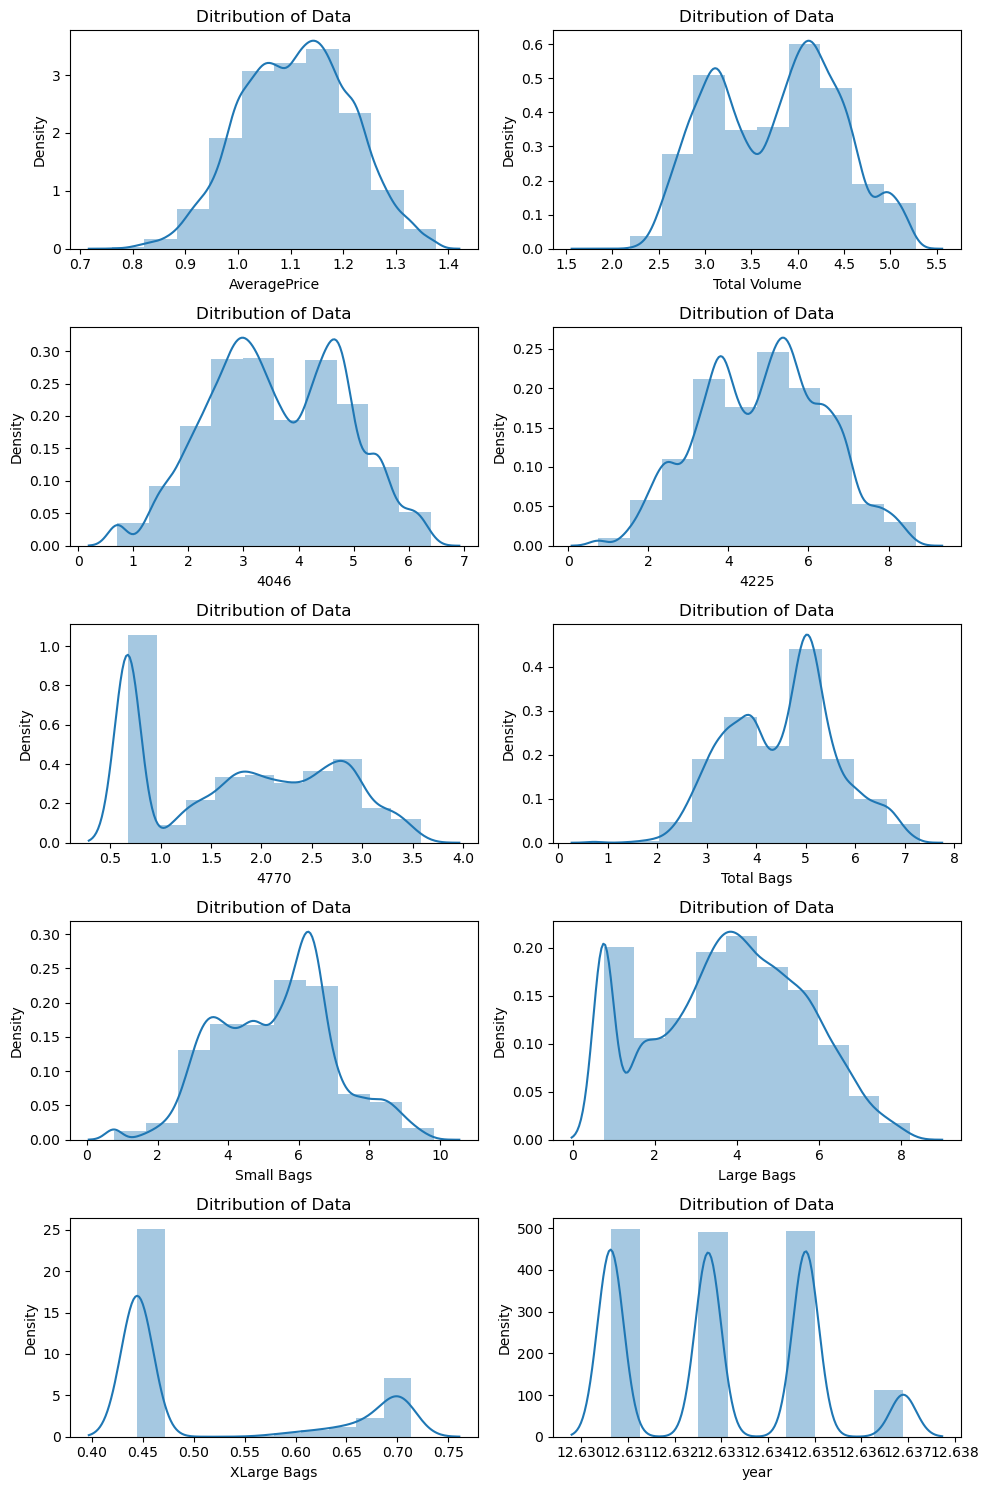

In [55]:
## Check distribution of data in each numerical column

plt.figure(figsize = (10, 15))
plotnumber = 1
for i in num_col:    
    if plotnumber <=10:
        plt.subplot(5,2, plotnumber)
        sns.distplot(df[i], bins=10)
        plt.xlabel(i, fontsize=10)
        plt.title('Ditribution of Data')
    plotnumber+=1
plt.tight_layout()  

### Observations:
- Its confirmed improvement in skewnes of each features.

<AxesSubplot:>

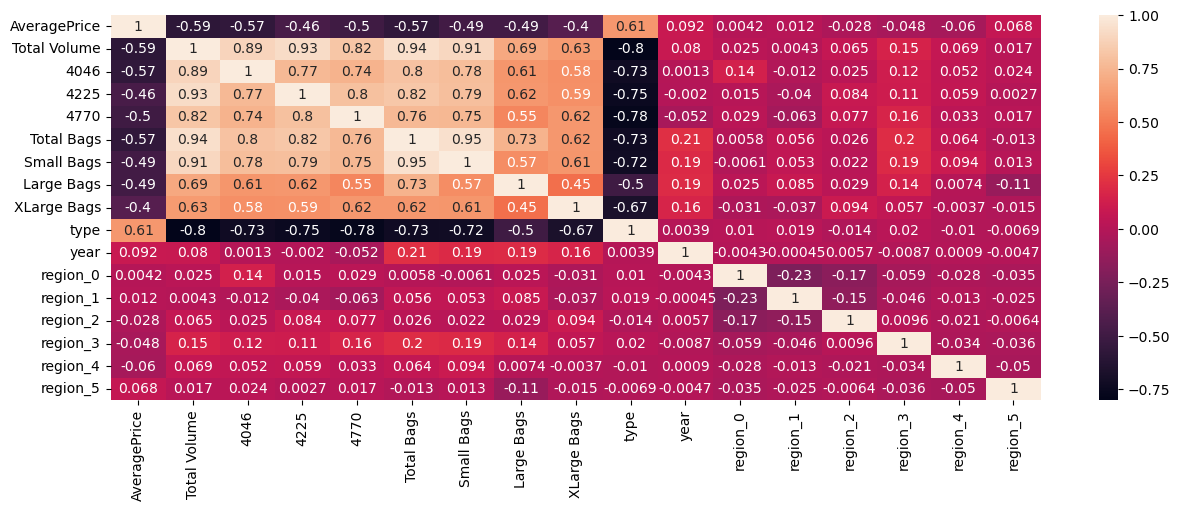

In [56]:
### Let's check relation between features v/s features to find multicollinearity with heatmap
plt.figure(figsize = (15, 5))
cor = df.corr()
sns.heatmap(cor, annot=True)

### Observation considering Regression problem (where target variable is AveragePrice):
- Relation between Features v/s Target variable 
 - Feature (Type) is having +ve correlation with Target variable.
 - Features (Total volume, 4046, Total Bags) are having -ve correaltion with Target variable
 - Also, can see all numerical columns having relation with Target variable.

- Relation between Features v/s Features
 - Total volume v/s type having stong -ve multicollinearity. However, strong +ve multicollinearity with features (4046, 4225, 4770, Total Bags, Small Bags)
 - 4046 v/s type having strong -ve multicollinearity. However, strong +ve multicollinearity with features (Total volume, Total bags)
 - 4225 v/s type having strong -ve multicollinearity. However, strong +ve multicollinearity with features (Total volume, Total bags)
 - 4770 v/s type having strong -ve multicollinearity. However, strong +ve multicollinearity with features (Total volume, 4225)
 - Total Bags v/s type having strong -ve multicollinearity. However, strong +ve multicollinearity with features (Total volume, small bags)
 - Small Bags v/s type having strong -ve multicollinearity. However, strong +ve multicollinearity with features (Total volume, Total bags)
  - This concludes strong multicollinearity (+ve/-ve) between almost all numerical features.
  - Also, can see feature (type) is having strong relation with Target variable and multicollinearity with almost all numerical features.
  - No multicollinearity seen between Target variable and categorical columns (except Type), also no multicollinearity (except Type).
  
  
### Observation considering Regression problem (where target variable is regions columns) 
- No Relation shown between Features v/s Target variable
- No multicollinearity between Features v/s Features

### Building Regression Model

In [57]:
## Creating new dataset by copying of original dataset for Regression Model building
df_regression = df.copy()

In [58]:
## Separating features and target into separate variables
x = df_regression.drop(['AveragePrice'], axis=1)
y = df_regression['AveragePrice']

#### Obervations:
- Split Target and Variables for further standarization.

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x1 = pd.DataFrame(x_scaled, columns = x.columns)
x1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region_0,region_1,region_2,region_3,region_4,region_5
0,-0.079111,-0.676270,0.355695,-0.210814,-0.543456,-0.353495,-0.766806,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
1,-0.151825,-0.795675,0.272719,-0.171280,-0.503688,-0.317050,-0.758015,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
2,0.204056,-0.750566,0.656311,0.002452,-0.572591,-0.380776,-0.746789,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
3,0.016620,-0.651356,0.474358,-0.125299,-0.720496,-0.518413,-0.693706,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
4,-0.185239,-0.703389,0.265230,-0.116114,-0.693546,-0.497812,-0.609930,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.684696,-0.479070,-0.940143,-1.241173,-0.344293,-0.180083,-0.427694,-0.682451,0.981309,1.980372,1.184262,1.178071,-0.905471,1.017085,0.991369,-1.008135
17647,-0.777648,-0.636711,-0.682915,-1.241173,-0.515187,-0.337899,-0.496419,-0.682451,0.981309,1.980372,1.184262,1.178071,-0.905471,1.017085,0.991369,-1.008135
17648,-0.781584,-0.636658,-0.792315,0.406010,-0.508978,-0.319507,-0.912927,-0.682451,0.981309,1.980372,1.184262,1.178071,-0.905471,1.017085,0.991369,-1.008135
17649,-0.708259,-0.565126,-0.729205,0.405698,-0.439072,-0.255524,-0.883626,-0.682451,0.981309,1.980372,1.184262,1.178071,-0.905471,1.017085,0.991369,-1.008135


In [60]:
x = x1 ## Transfer standarized data into original set
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region_0,region_1,region_2,region_3,region_4,region_5
0,-0.079111,-0.676270,0.355695,-0.210814,-0.543456,-0.353495,-0.766806,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
1,-0.151825,-0.795675,0.272719,-0.171280,-0.503688,-0.317050,-0.758015,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
2,0.204056,-0.750566,0.656311,0.002452,-0.572591,-0.380776,-0.746789,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
3,0.016620,-0.651356,0.474358,-0.125299,-0.720496,-0.518413,-0.693706,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
4,-0.185239,-0.703389,0.265230,-0.116114,-0.693546,-0.497812,-0.609930,-0.682451,-1.019047,-1.210129,-0.844408,-0.848845,-0.905471,-0.983202,-1.008706,0.991931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.684696,-0.479070,-0.940143,-1.241173,-0.344293,-0.180083,-0.427694,-0.682451,0.981309,1.980372,1.184262,1.178071,-0.905471,1.017085,0.991369,-1.008135
17647,-0.777648,-0.636711,-0.682915,-1.241173,-0.515187,-0.337899,-0.496419,-0.682451,0.981309,1.980372,1.184262,1.178071,-0.905471,1.017085,0.991369,-1.008135
17648,-0.781584,-0.636658,-0.792315,0.406010,-0.508978,-0.319507,-0.912927,-0.682451,0.981309,1.980372,1.184262,1.178071,-0.905471,1.017085,0.991369,-1.008135
17649,-0.708259,-0.565126,-0.729205,0.405698,-0.439072,-0.255524,-0.883626,-0.682451,0.981309,1.980372,1.184262,1.178071,-0.905471,1.017085,0.991369,-1.008135


### Observations:
Can see data has been standarized by standard scaler.

In [61]:
from sklearn.feature_selection import SelectKBest, f_classif

In [62]:
best_features = SelectKBest(score_func=f_classif, k=16)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
features_scores = pd.concat([df_columns, df_scores], axis=1)
features_scores.columns = ['Feature_Name', 'Score']
print(features_scores.nlargest(16,'Score'))

    Feature_Name      Score
8           type  58.944331
0   Total Volume  47.065877
1           4046  43.567976
4     Total Bags  41.897834
3           4770  32.371419
5     Small Bags  29.062420
6     Large Bags  27.480823
2           4225  26.049185
7    XLarge Bags  18.080880
9           year   3.557191
14      region_4   2.072177
13      region_3   1.973701
15      region_5   1.971970
12      region_2   1.736864
11      region_1   1.275362
10      region_0   1.199534


### Observations:
- Basis observation of above plotting for relationship between features and target variable.
- Along with Select K Best, features will be selected who have highest score.

In [63]:
final_selection = df.drop(['4770', 'Small Bags', 'Large Bags', '4225', 'XLarge Bags','year', 'region_4','region_3', 'region_5', 'region_2', 'region_1', 'region_0'], axis=1)
final_selection
x = final_selection

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [65]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 30)

In [66]:
RFR = RandomForestRegressor()
ETR = ExtraTreesRegressor()
GBR = GradientBoostingRegressor()
ABR = AdaBoostRegressor()
BR =  BaggingRegressor()
LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DTR = DecisionTreeRegressor()
KNR = KNeighborsRegressor()
svr = SVR()

In [67]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print('R2 score: ', r2_score(y_train, y_pred)*100)       
        print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
        print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, y_pred)))
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print("R2 Score:  ", r2_score(y_test, pred)*100)
        print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
        print('Mean Squared Error: ', mean_squared_error(y_test, pred))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
        print('\n')

In [68]:
models = [('RFR', RFR), ('ETR', ETR), ('GBR', GBR), ('ABR', ABR), ('BR', BR),  ('LR', LR), ('Lasso', lasso), ('Ridge', ridge), ('DTR', DTR), ('KNR', KNR), ('SVR', svr)]
for model_name, model in models:
    model.fit(x_train, y_train)

In [69]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFR

---------------Train Result---------------
R2 score:  99.9999380139154
Mean Absolute Error:  2.026197232658071e-06
Mean Squared Error:  6.663841408384792e-09
Root Mean Squared Error:  8.163235515642552e-05

---------------Test Result---------------
R2 Score:   99.99951228008676
Mean Absolute Error:  6.42817804675312e-06
Mean Squared Error:  5.107418828950329e-08
Root Mean Squared Error:  0.00022599599175539219


Model Name: ETR

---------------Train Result---------------
R2 score:  100.0
Mean Absolute Error:  1.8140883198941966e-15
Mean Squared Error:  4.0580304710936806e-30
Root Mean Squared Error:  2.014455378283093e-15

---------------Test Result---------------
R2 Score:   99.9992710775658
Mean Absolute Error:  9.772218346503081e-06
Mean Squared Error:  7.633299490507991e-08
Root Mean Squared Error:  0.0002762842646715153


Model Name: GBR

---------------Train Result---------------
R2 score:  99.99584831165724
Mean Absolute Error:  0.0004758702146930436
Mean Square

### Observations:
- Considering following metric scores (R2, MAE, MSE, RSME) on both train and test data, seems almost all models are peforming 100%.
- Let's check if they are overfitting to the model, basis which we can select best model

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
for model_name, model in models:
    score = cross_val_score(model, x, y, cv=10)
    print(f"Model Name: {model_name}")
    print('R2 Score = ',r2_score(y_test, model.predict(x_test))*100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between R2 Score and Cross Validation Score = ', r2_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFR
R2 Score =  99.99951228008676
Cross validation score =  99.99943109978851
Difference between R2 Score and Cross Validation Score =  8.118029825032735e-07


Model Name: ETR
R2 Score =  99.9992710775658
Cross validation score =  99.9944438949299
Difference between R2 Score and Cross Validation Score =  4.827182635902538e-05


Model Name: GBR
R2 Score =  99.99513008272119
Cross validation score =  99.99173359075421
Difference between R2 Score and Cross Validation Score =  3.3964919669893234e-05


Model Name: ABR
R2 Score =  99.47258215467349
Cross validation score =  98.90725327885318
Difference between R2 Score and Cross Validation Score =  0.0056532887582031455


Model Name: BR
R2 Score =  99.99951782939465
Cross validation score =  99.99926390354827
Difference between R2 Score and Cross Validation Score =  2.5392584637184967e-06


Model Name: LR
R2 Score =  100.0
Cross validation score =  100.0
Difference between R2 Score and Cross Validation Score =  0.0


Model Name: 

#### Observations:
- Can see most of the models R2 scores are showing amost 100% performance.
- However, basis least difference between R2 Score and Cross Validation Score, will select the best model.
- The LR (Linear Regression) model seems to have a perfect fit on both training and test data, along with a perfect cross-validation score. This might imply overfitting, especially when achieving 100% on both training and test sets.
- Bagging Regressor will be select as final model with least difference between R2 Score and Cross Validation Score.

In [72]:
## Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [73]:
base_regressor = BaggingRegressor()
param_grid = {'n_estimators': list(range(10, 30, 5)),
              'max_samples': list(range(1, 6, 1)),
              'n_jobs': [-1],
              'max_features': list(range(1, 6, 1)),
              'bootstrap': [True],              
             } 

In [74]:
gridsearch = GridSearchCV(base_regressor, param_grid, cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'bootstrap': [True], 'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 15, 20, 25], 'n_jobs': [-1]})

In [75]:
gridsearch.best_estimator_

BaggingRegressor(max_features=5, max_samples=5, n_jobs=-1)

In [76]:
gridsearch.best_score_

0.7829243314286984

In [77]:
Final_model = BaggingRegressor(max_features=5, max_samples=5, n_jobs=-1)
Final_model.fit(x_train,y_train)

BaggingRegressor(max_features=5, max_samples=5, n_jobs=-1)

In [78]:
y_pred = Final_model.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final_model.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  73.31710288167086

---------------Test Result---------------
R2 Score:   73.51478291234844
Mean Absolute Error:  0.0381384957130734
Mean Squared Error:  0.0027735405664056586
Root Mean Squared Error:  0.052664414611819796




## Observation:
- R2 score significant decreased from 99% to 73%, which confirmed overfitting of earlier model was seems resolved by Hypertuning. However, no changes can be seen in metric scores.
- Let's check with tuning the parameters slightly if performance get increased.

In [79]:
Final_model = BaggingRegressor(max_features=5, max_samples=10, n_jobs=-1)
Final_model.fit(x_train,y_train)

BaggingRegressor(max_features=5, max_samples=10, n_jobs=-1)

In [80]:
y_pred = Final_model.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final_model.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  88.84897975883594

---------------Test Result---------------
R2 Score:   89.24899647819043
Mean Absolute Error:  0.021859427400846836
Mean Squared Error:  0.0011258485931463782
Root Mean Squared Error:  0.03355366735762841




## Observation:
R2 score significant improved from 73% to 89%, basis slight tuning parameters.

In [81]:
Final_model = BaggingRegressor(max_features=5, max_samples=15, n_jobs=-1)
Final_model.fit(x_train,y_train)

BaggingRegressor(max_features=5, max_samples=15, n_jobs=-1)

In [82]:
y_pred = Final_model.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final_model.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  96.44298580114952

---------------Test Result---------------
R2 Score:   96.6865172473938
Mean Absolute Error:  0.011878232235018939
Mean Squared Error:  0.00034698899389892405
Root Mean Squared Error:  0.01862764058862324




## Observation:
R2 score significant improved from 89% to 96%, basis slight tuning parameters.

In [83]:
Final_model = BaggingRegressor(max_features=5, max_samples=1000, n_jobs=-1)
Final_model.fit(x_train,y_train)

BaggingRegressor(max_features=5, max_samples=1000, n_jobs=-1)

In [84]:
y_pred = Final_model.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final_model.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  99.99482816862457

---------------Test Result---------------
R2 Score:   99.99261220731567
Mean Absolute Error:  0.00012993218306089362
Mean Squared Error:  7.736520579892155e-07
Root Mean Squared Error:  0.0008795749302869059




### Observations:
- After tuning the parameters, we reached R2 score as almost 100%, like it was before hyperparameter tuning.

<AxesSubplot:xlabel='AveragePrice'>

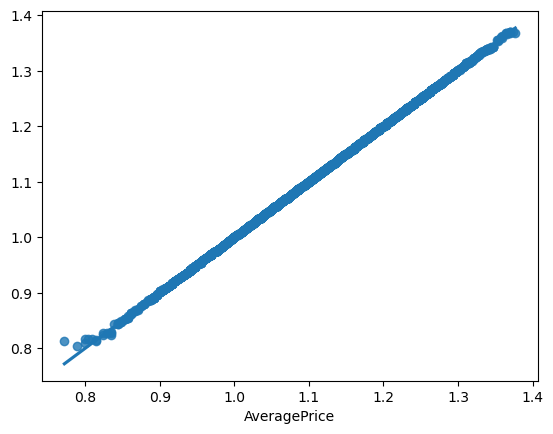

In [85]:
### Plotting to check relation betweeen y_test and y_pred
sns.regplot(x=y_test, y= pred)

#### Observation:
- Can be uniform distribution between y_test and y_pred

#### Saving the final Regression model

In [86]:
import pickle

In [87]:
pickle.dump(Final_model, open('Avocado Project_Regresion','wb'))

In [88]:
## Do the predication
loaded_model = pickle.load(open('Avocado Project_Regresion','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
df_new = pd.DataFrame()
df_new['Predicted'] = predicted
df_new['Original'] = original
df_new

,Predicted,Original
0,1.035399,1.035399
1,1.184048,1.184048
2,1.154800,1.154800
3,1.184048,1.184048
4,0.879782,0.879366
...,...,...
4408,1.071441,1.071441
4409,1.113336,1.113336
4410,1.121346,1.121346
4411,1.144714,1.144714


#### Observation:
- Can see model is predicting almost like original dataset

In [89]:
print("R2 Score:  ", r2_score(y_test, predicted)*100)

R2 Score:   99.99261220731567


### Building Classification Model

In [90]:
## Creating new dataset by copying of original dataset for Regression Model building
df_classification = df.copy()

In [95]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17651 entries, 2015-12-27 to 2018-01-07
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17651 non-null  float64
 1   Total Volume  17651 non-null  float64
 2   4046          17651 non-null  float64
 3   4225          17651 non-null  float64
 4   4770          17651 non-null  float64
 5   Total Bags    17651 non-null  float64
 6   Small Bags    17651 non-null  float64
 7   Large Bags    17651 non-null  float64
 8   XLarge Bags   17651 non-null  float64
 9   type          17651 non-null  float64
 10  year          17651 non-null  float64
 11  region_0      17651 non-null  float64
 12  region_1      17651 non-null  float64
 13  region_2      17651 non-null  float64
 14  region_3      17651 non-null  float64
 15  region_4      17651 non-null  float64
 16  region_5      17651 non-null  float64
dtypes: float64(17)
memory usage: 2.4 MB


In [97]:
## Separating features and target into separate variables
columns_to_drop = ['region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5']
x_new = df_classification.drop(columns_to_drop, axis=1)
y_new = df_classification[columns_to_drop]

#### Obervations:
- Split Target and Variables for further standarization.

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_new)
x1 = pd.DataFrame(x_scaled, columns = x_new.columns)
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.105207,-0.079111,-0.676270,0.355695,-0.210814,-0.543456,-0.353495,-0.766806,-0.682451,-1.019047,-1.210129
1,-0.052135,-0.151825,-0.795675,0.272719,-0.171280,-0.503688,-0.317050,-0.758015,-0.682451,-1.019047,-1.210129
2,-1.301377,0.204056,-0.750566,0.656311,0.002452,-0.572591,-0.380776,-0.746789,-0.682451,-1.019047,-1.210129
3,-0.818693,0.016620,-0.651356,0.474358,-0.125299,-0.720496,-0.518413,-0.693706,-0.682451,-1.019047,-1.210129
4,-0.240257,-0.185239,-0.703389,0.265230,-0.116114,-0.693546,-0.497812,-0.609930,-0.682451,-1.019047,-1.210129
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.641259,-0.684696,-0.479070,-0.940143,-1.241173,-0.344293,-0.180083,-0.427694,-0.682451,0.981309,1.980372
17647,0.824585,-0.777648,-0.636711,-0.682915,-1.241173,-0.515187,-0.337899,-0.496419,-0.682451,0.981309,1.980372
17648,1.174756,-0.781584,-0.636658,-0.792315,0.406010,-0.508978,-0.319507,-0.912927,-0.682451,0.981309,1.980372
17649,1.300910,-0.708259,-0.565126,-0.729205,0.405698,-0.439072,-0.255524,-0.883626,-0.682451,0.981309,1.980372


In [99]:
x_new = x1 ## Transfer standarized data into original set
x_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.105207,-0.079111,-0.676270,0.355695,-0.210814,-0.543456,-0.353495,-0.766806,-0.682451,-1.019047,-1.210129
1,-0.052135,-0.151825,-0.795675,0.272719,-0.171280,-0.503688,-0.317050,-0.758015,-0.682451,-1.019047,-1.210129
2,-1.301377,0.204056,-0.750566,0.656311,0.002452,-0.572591,-0.380776,-0.746789,-0.682451,-1.019047,-1.210129
3,-0.818693,0.016620,-0.651356,0.474358,-0.125299,-0.720496,-0.518413,-0.693706,-0.682451,-1.019047,-1.210129
4,-0.240257,-0.185239,-0.703389,0.265230,-0.116114,-0.693546,-0.497812,-0.609930,-0.682451,-1.019047,-1.210129
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.641259,-0.684696,-0.479070,-0.940143,-1.241173,-0.344293,-0.180083,-0.427694,-0.682451,0.981309,1.980372
17647,0.824585,-0.777648,-0.636711,-0.682915,-1.241173,-0.515187,-0.337899,-0.496419,-0.682451,0.981309,1.980372
17648,1.174756,-0.781584,-0.636658,-0.792315,0.406010,-0.508978,-0.319507,-0.912927,-0.682451,0.981309,1.980372
17649,1.300910,-0.708259,-0.565126,-0.729205,0.405698,-0.439072,-0.255524,-0.883626,-0.682451,0.981309,1.980372


In [105]:
y_new

,region_0,region_1,region_2,region_3,region_4,region_5
Date,,,,,,
2015-12-27,0.0,0.0,0.0,0.0,0.0,1.0
2015-12-20,0.0,0.0,0.0,0.0,0.0,1.0
2015-12-13,0.0,0.0,0.0,0.0,0.0,1.0
2015-12-06,0.0,0.0,0.0,0.0,0.0,1.0
2015-11-29,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
2018-02-04,1.0,1.0,0.0,1.0,1.0,0.0
2018-01-28,1.0,1.0,0.0,1.0,1.0,0.0
2018-01-21,1.0,1.0,0.0,1.0,1.0,0.0


#### Observations:
- Can see data has been standarized by standard scaler.

In [108]:
## Checking Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x_new,i) for i in range(x_new.shape[1])]
vif['Features'] = x_new.columns
vif

,Vif,Features
0,2.119309,AveragePrice
1,57.956655,Total Volume
2,7.112520,4046
3,12.990423,4225
4,3.927189,4770
5,37.083615,Total Bags
6,17.462118,Small Bags
7,3.513116,Large Bags
8,2.061672,XLarge Bags
9,4.099929,type


### Observation:
- Confirmed strong correlation between features, will remove highest Vif to improve the multicollinearity

In [111]:
x_new = x_new.drop(['Total Volume'], axis=1)

In [112]:
x_new

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.105207,-0.676270,0.355695,-0.210814,-0.543456,-0.353495,-0.766806,-0.682451,-1.019047,-1.210129
1,-0.052135,-0.795675,0.272719,-0.171280,-0.503688,-0.317050,-0.758015,-0.682451,-1.019047,-1.210129
2,-1.301377,-0.750566,0.656311,0.002452,-0.572591,-0.380776,-0.746789,-0.682451,-1.019047,-1.210129
3,-0.818693,-0.651356,0.474358,-0.125299,-0.720496,-0.518413,-0.693706,-0.682451,-1.019047,-1.210129
4,-0.240257,-0.703389,0.265230,-0.116114,-0.693546,-0.497812,-0.609930,-0.682451,-1.019047,-1.210129
...,...,...,...,...,...,...,...,...,...,...
17646,0.641259,-0.479070,-0.940143,-1.241173,-0.344293,-0.180083,-0.427694,-0.682451,0.981309,1.980372
17647,0.824585,-0.636711,-0.682915,-1.241173,-0.515187,-0.337899,-0.496419,-0.682451,0.981309,1.980372
17648,1.174756,-0.636658,-0.792315,0.406010,-0.508978,-0.319507,-0.912927,-0.682451,0.981309,1.980372
17649,1.300910,-0.565126,-0.729205,0.405698,-0.439072,-0.255524,-0.883626,-0.682451,0.981309,1.980372


## Observations:
- After dropping Total volume, data shape having 17651 rows and 10 columns

In [113]:
## recheck the VIF after droping highest VIF column
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x_new,i) for i in range(x_new.shape[1])]
vif['Features'] = x_new.columns
vif

,Vif,Features
0,2.061937,AveragePrice
1,3.662059,4046
2,4.679819,4225
3,3.915044,4770
4,27.084546,Total Bags
5,17.456335,Small Bags
6,3.454226,Large Bags
7,2.050212,XLarge Bags
8,3.968266,type
9,1.413851,year


### Observation:
- Still strong correlation between features, will remove highest Vif to improve the multicollinearity

In [114]:
x_new = x_new.drop(['Total Bags'], axis=1)

In [115]:
x_new

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.105207,-0.676270,0.355695,-0.210814,-0.353495,-0.766806,-0.682451,-1.019047,-1.210129
1,-0.052135,-0.795675,0.272719,-0.171280,-0.317050,-0.758015,-0.682451,-1.019047,-1.210129
2,-1.301377,-0.750566,0.656311,0.002452,-0.380776,-0.746789,-0.682451,-1.019047,-1.210129
3,-0.818693,-0.651356,0.474358,-0.125299,-0.518413,-0.693706,-0.682451,-1.019047,-1.210129
4,-0.240257,-0.703389,0.265230,-0.116114,-0.497812,-0.609930,-0.682451,-1.019047,-1.210129
...,...,...,...,...,...,...,...,...,...
17646,0.641259,-0.479070,-0.940143,-1.241173,-0.180083,-0.427694,-0.682451,0.981309,1.980372
17647,0.824585,-0.636711,-0.682915,-1.241173,-0.337899,-0.496419,-0.682451,0.981309,1.980372
17648,1.174756,-0.636658,-0.792315,0.406010,-0.319507,-0.912927,-0.682451,0.981309,1.980372
17649,1.300910,-0.565126,-0.729205,0.405698,-0.255524,-0.883626,-0.682451,0.981309,1.980372


## Observations:
- After dropping Total Bags, data shape having 17651 rows and 9 columns

In [116]:
## recheck the VIF after droping highest VIF column
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x_new,i) for i in range(x_new.shape[1])]
vif['Features'] = x_new.columns
vif

,Vif,Features
0,1.907108,AveragePrice
1,3.657701,4046
2,4.394250,4225
3,3.914396,4770
4,4.179819,Small Bags
5,2.049865,Large Bags
6,2.050113,XLarge Bags
7,3.949663,type
8,1.361037,year


## Observations:
- Can see multicollinearity has been resolved.

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [155]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = 100)

In [162]:
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
LR = LogisticRegression()
svc = SVC()
DTC = DecisionTreeClassifier()
KNN = KNeighborsClassifier()

In [163]:
models = [('RFC', RFC), ('ETC', ETC), ('GBC', GBC), ('ABC', ABC), ('BC', BC), ('LR', LR), ('svc', svc), ('DTC', DTC), ('KNN', KNN)]

for model_name, model in models:    
    for i in range(y_train.shape[1]):  # Due to having multiple columns (6) in 'y_train'
        model.fit(x_train, y_train.iloc[:, i])  # Fit the model for each column of y_train


In [165]:
def metric_score(model, model_name, x_train,x_test,y_train,y_test, i, train=True):
    if train:
        y_pred.iloc[:, i] = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_train.iloc[:, i], y_pred.iloc[:, i]) * 100:.2f}%")
    elif train==False:
        pred.iloc[:, i] = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_test.iloc[:, i], pred.iloc[:, i]) * 100:.2f}%")        
        print('\n \n Confusion Matrix \n', confusion_matrix(y_test.iloc[:, i], pred.iloc[:, i]))
        print('\n \n Test Classification Report \n', classification_report(y_test.iloc[:, i], pred.iloc[:, i], digits=2))